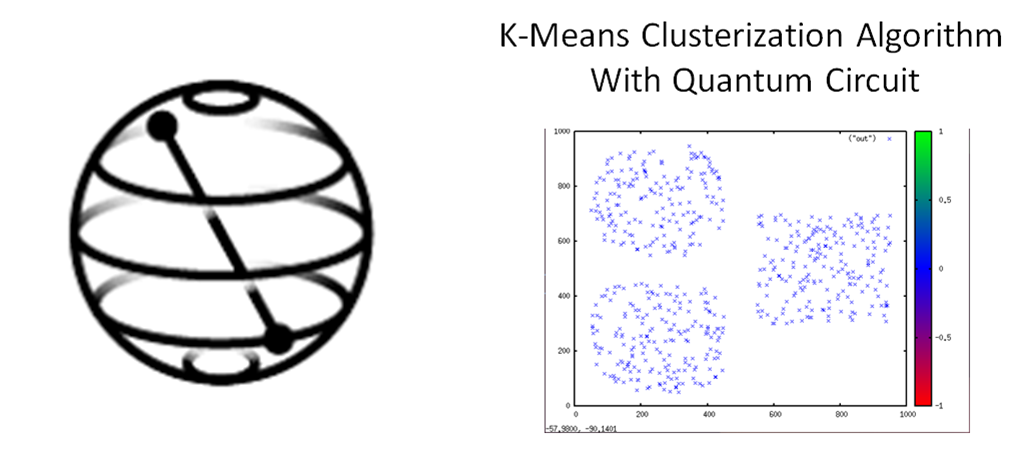

By Ennio Picarelli and Claudio Retico

## Part 2 - Quantum Calculation

Inspired by the article _Quantum K-Means algoritm_ written by Shan Jin, Xi He, Xiaokai Hou, Li Sun, Dingding Wen, Shaojun Wu, and Xiaoting Wang

## Determination of the distance between two points in quantum logic

Let's see how to apply a quantum circuit to calculate the distance between two points.

It is not a real Euclidean distance but a measure of the probability for the two qubits at which has been imposed a  'rotation' equal to the $\theta_1\quad and\quad \theta_2\quad $angle of being considered as equal (the more the angle are close, the more increases this probability)

## But first ... let's recall some concepts of quantum computing:

$\text a)\quad superposition$

is the ability of a qubit to assume simultaneously more logical states that vary continuously from the value 0 to the value 1. The superposition on a quantum computer is obtained by applying to the qubit a Hadamard gate that gives a rotation to the qubit around the z+x axis. This rotation involves the transformation of Z into X and of X into Z. We can see the effect through the bloch sphere that represents the qubit before and after the application of the port.

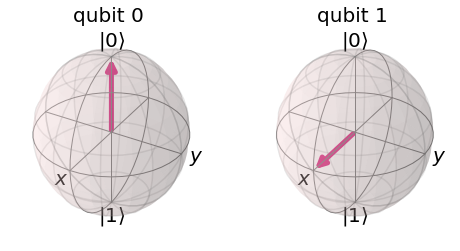

$\text b)\quad entanglement$

It is the characteristic that binds some qubits together and makes them become part of a single quantum system. In this case what happens to a qubit is reflected instantly to the other qubits of the system. To achieve entanglement between qubits, the quantum computer uses controlled gates that determine the state of one or more qubits together on the basis of the value assumed by a qubit controller (or ancilla qubit).


## The c-swap circuit
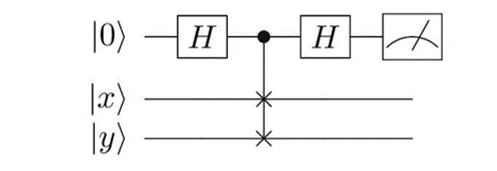

The circuit is composed by a so called controlled swap (c-swap) or Fredkin circuit. An ancilla bit is controlling two input X and Y. If the Ancilla value is 1 then the X and Y values are swapped. In Classic Computing the truth tabel of the circuit is the following:

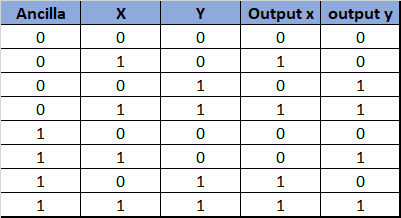

We can see that the ancilla 1 acts only when the values of the controlled bit are different so, in this case, it can be compared to an XOR or a difference without sign of two bits.


In the Quantum implementation of this example the ancilla bit is put in superposition state by using a Hadamard gate, then another Hadamard makes the circuit reversible. 

The c-swap circuit inverts the controlled qubits when the value of the ancilla bit is one and puts the whole system in entanglement status.

Only the ancilla bit is measured at the end but, because of the entanglement state of the system it records also the states of the controlled qubits.

With reference to the figure, the whole state of the quantum system can be expressed by:

1)  $$|0_{anc}\rangle|x\rangle|y\rangle \rightarrow \frac{1}{2}|0_{anc}\rangle(|xy\rangle+|yx\rangle) + \frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)$$

In fact starting from $|x0_{anc}y\rangle$ and applying the first Hadamard circuit we obtain 
$$\frac{1}{\sqrt2}(|x0_{anc}y\rangle+|x1_{anc}y\rangle)$$

then applying the C-swap circuit we get
$$\frac{1}{\sqrt2}(|x0_{anc}y\rangle+|y1_{anc}x\rangle)$$

At last, applying the second Hadamard circuit on Ancilla qubit we get

$$\frac{1}{2}(|x0_{anc}y\rangle+|x1_{anc}y\rangle+|y0_{anc}x\rangle-|y1_{anc}x\rangle)$$ 
and then

$$\frac{1}{2}|0_{anc}\rangle(|xy\rangle+|yx\rangle) + \frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)$$

Starting from 1) can be demonstrated that the probability to measure $|1\rangle$ as the final state is

2) $$P(|1_{anc}\rangle)=\frac{1}{2}-\frac{1}{2}|\langle x|y\rangle|^2$$

In fact 
$$\frac{1}{2}|1_{anc}\rangle(|xy\rangle-|yx\rangle)\rightarrow\frac{1}{2}|1_{anc}\rangle=$$

let's consider the tensor products

$$ \frac{1}{2}|1_{anc}\rangle\left[  \left(\begin{matrix} 
x_1\left(\begin{matrix}y_1\\y_2\end{matrix}\right)\\
x_2\left(\begin{matrix}y_1\\y_2\end{matrix}\right) 
\end{matrix}\right)-\left(\begin{matrix} 
y_1\left(\begin{matrix}x_1\\x_2\end{matrix}\right)\\
y_2\left(\begin{matrix}x_1\\x_2\end{matrix}\right) 
\end{matrix}\right)\right]
=$$

$$
 \frac{1}{2}|1_{anc}\rangle\left[  \left(\begin{matrix} 
x_1y_1\\
x_1y_2\\ 
x_2y_1\\
x_2y_2
\end{matrix}\right)-\left(\begin{matrix} 
x_1y_1\\
y_1x_2\\
y_2x_1\\
y_2x_2
\end{matrix}\right)\right]
=\frac{1}{2}\left(\begin{matrix} 
0\\
x_1y_2-y_1x_2\\ 
x_2y_1-y_2x_1\\
0
\end{matrix}\right)$$
then it follows 

$$P(1_{anc})\propto\frac{1}{4}\left[{(x_1y_1-y_1x_2)}^2+{(x_2y_1-y_2x_1)}^2\right] = \frac{1}{4}(x_1^2y_2^2+ y_1^2x_2^2+x_2^2y_1^2+y_2^2x_1^2-4x_1x_2y_1y_2)=$$

$$
\color{blue}{
\frac{1}{2}(x_1^2y_2^2+y_1^2x_2^2-2x_1x_2y_1y_2)}$$

Starting from the 2) instead we have (considering that the qubit can be considered a base in $C_n$ and so $y_1^2+y_2^2=1$)

$$
P(|1_{anc}\rangle)=\frac{1}{2}-\frac{1}{2}|\langle x|y\rangle|^2=
\frac{1}{2}[1-{(x_1y_1+x_2y_2)}^2]=$$

$$
\frac{1}{2}[1-(x_1^2y_1^2+x_2^2y_2^2+2x_1x_2y_1y_2)]=\frac{1}{2}\{1-[(1-x_2^2)y_1^2+(1-x_1^2)y_2^2+2x_1x_2y_1y_2 ]\}=$$

$$
\frac{1}{2}[1-(y_1^2-x_2^2y_1^2+y_2^2-x_1^2y_2^2+2x_1x_2y_1y_2)]=\frac{1}{2}[1-(1-x_2^2y_1^2-x_1^2y_2^2+2x_1x_2y_1y_2)]=$$

$$
\color{blue}{
\frac{1}{2}(x_1^2y_2^2+y_1^2x_2^2-2x_1x_2y_1y_2)}$$


The 2) is in positive correlation with the Dirac expression of the Euclidean distance:

$Euclidean Distance=\sqrt{(2-2|\langle x|y\rangle|)}$     (it can be demonstrated starting from the traditional expression of the Euclidean distance:
$d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$ = 

$\sqrt{x_1^2+y_1^2-2x_1y_1+x_2^2+y_2^2-2x_2y_2}$  and considering that the qubit can be considered a base in $C_n$

=  $\sqrt{2-2(x_1y_1+x_2y_2)}$ but $x_1y_1+x_2y_2$ is equal to $\langle x|y\rangle$ ...



In the following exercise we will put $U_3 gates $ in the controlled qubit applyng to the qubits a rotation $\theta$ equal to the arctangent of the ratio between the two features of the "Classic" section.

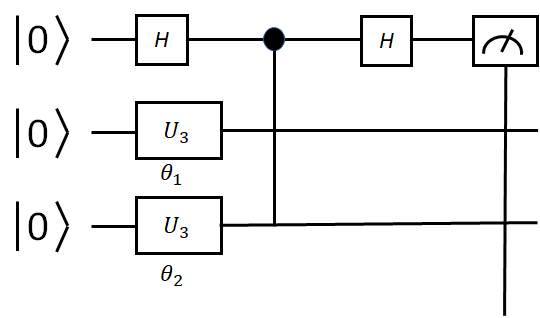

If the angle are close each other then the probability that the two qubits are considered equals (and so the probability of 'one' measure of the ancilla) is low. Instead, in the case the angle are different, the c-swap operates more often and the 'one' measure rate is higher. 


## Some quantum recalls

What is the $U_3$ gate? 
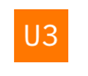

It is a 'physical' gate able to give rotations to a qubit around the X, Y and Z axes. It receives in input 3 values corresponding to the value in radians of the rotations to be impressed. In our case we consider just the X-rotation introducing a fixed $\pi$ rotation around Y and Z.


## Preparation of libraries 

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
!pip install qiskit 
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


     |████████████████████████████████| 1.6MB 12.7MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 22.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 26.7MB/s eta 0:00:01
     |████████████████████████████████| 102kB 33.0MB/s ta 0:00:01
     |████████████████████████████████| 983kB 49.2MB/s eta 0:00:01
     |████████████████████████████████| 51kB 23.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 30.1MB/s eta 0:00:01
     |████████████████████████████████| 21.7MB 29.1MB/s eta 0:00:01
     |████████████████████████████████| 6.7MB 44.8MB/s eta 0:00:01
     |████████████████████████████████| 143kB 53.2MB/s eta 0:00:01
     |████████████████████████████████| 11.6MB 19.1MB/s eta 0:00:01
     |████████████████████████████████| 296kB 49.5MB/s eta 0:00:01


     |████████████████████████████████| 81kB 30.5MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/4e/f0/27/e914f739445603aa0229efc92a205fbbe3535aa1054b5a1f67
  Stored in directory: /home/dsxuser/.cache/pip/wheels/52/ff/94/ed9ed05fff0099b4de0a27df50fcf3bc7a0db91b356819dc1c
  Stored in directory: /home/dsxuser/.cache/pip/wheels/68/f5/09/1dcfa8613b095bb326caadfb4b111d7fc945875948b75f5c14
  Stored in directory: /home/dsxuser/.cache/pip/wheels/7e/95/df/935f19af51d6ab63d416c103c0d6eae7048a8c2ecb00a1497f
  Stored in directory: /home/dsxuser/.cache/pip/wheels/bb/ba/15/fdd0deb104df3254912998150ba9245668db06b00af5912d1a
  Stored in directory: /home/dsxuser/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built qiskit qiskit-ibmq-provider marshmallow-polyfield fastdtw dlx inflection
ERROR: autoai-libs 1.10.3 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.3 has requirement p

In [3]:
import sys
import types
import pip
import numpy as np
import math
import pandas as pd

In [4]:
pi = math.pi

## Connection with IBM Q systems (both physical and simulation)

In [5]:
# Loading your IBM Q account(s)
provider = IBMQ.enable_account('82e32aa428a75f823b1c7e881fe0d985c0828d1ca9a873f08adca0656b915061aabf416855ede9c9092f33dc9de08bba019e5976ae3d312273a2607e06c6a509')
import getpass, time
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer, IBMQ


# import basic plot tools
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import iplot_histogram


In [6]:
backend = Aer.get_backend('qasm_simulator')

## Loading the dataset for quantum analysis

WARNING: no multiplication by 10,000 of theta to not distort any calculation

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YiaJob6uTcDVElr7CTjWhrloL9H7tP1gR_GmDWCli8sh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='matrix-donotdelete-pr-dch8wobsozzamt',Key='DataForQComparison.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
dataset=df_data_1
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))
dataset['ID']=dataset.reset_index().index
dataset.head(10)

,Annual Income_k$,Spending Score_1_to_100,Teta,ID
0,19,99,0.189614,0
1,29,87,0.321751,1
2,21,66,0.308053,2
3,34,73,0.435877,3
4,21,35,0.540420,4
5,34,17,1.107149,5
6,20,15,0.927295,6
7,33,4,1.450173,7
8,46,46,0.785398,8
9,49,55,0.727770,9


In [9]:
dataset.shape

(20, 4)

In [10]:
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit ( qr, cr, name="k_means")

## First build and test of quantum circuit
A particular aspect of quantum programming is that an algorithm is created by defining a "quantum circuit". This circuit is volatile, i.e. every time the measurement is made on it, it collapses in a specific state making the whole circuit no more usable. So this must be recreated. In case of iterative cycles, therefore, at each cycle the circuit must be recreated.

In [11]:
#Circuit test
#from the dataset we get the first and the 7th theta valuest
i=0
j=7

theta_1 = dataset.at[i,'Teta']
theta_2 = dataset.at[i+j,'Teta']
#Compose the quantum circuit via qiskit
#apply the first Hadamard gate to the ancilla qubit
qc.h(qr[1])
#apply the U3 gates to the controlled qubits 
qc.u3(theta_1, pi, pi, qr[0])
qc.u3(theta_2, pi, pi, qr[2])
#apply the c-swap circuit
qc.cswap(qr[1], qr[0], qr[2])
#apply the second Hadamard gate to the ancilla qubit
qc.h(qr[1])
#make the measurement
qc.measure(qr[1], cr[1])

job_exp = execute(qc, backend=backend, shots=4096)  
result = job_exp.result()
print(result)


Result(backend_name='qasm_simulator', backend_version='0.3.2', date=datetime.datetime(2019, 11, 8, 11, 8, 51, 535661), header=Obj(backend_name='qasm_simulator', backend_version='0.3.2'), job_id='dbfaef61-af89-4be2-bfd4-eac15f307ec1', metadata={'max_memory_mb': 121916, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.008975247}, qobj_id='badd32ed-e36c-4456-8982-62391c628d72', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=3376, 0x2=720)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2]], creg_sizes=[['c0', 3]], memory_slots=3, n_qubits=3, name='k_means', qreg_sizes=[['q0', 3]], qubit_labels=[['q0', 0], ['q0', 1], ['q0', 2]]), meas_level=2, metadata={'measure_sampling': True, 'method': 'statevector', 'parallel_shots': 1, 'parallel_state_update': 56}, seed_simulator=2044073938, shots=4096, status='DONE', success=True, time_taken=0.008775159000000001)], status='COMPLETED', success=True, time_taken=0.023050546646118164)


In [12]:
circuit_drawer(qc)

In [13]:
print(result.get_counts(qc))

{'000': 3376, '010': 720}


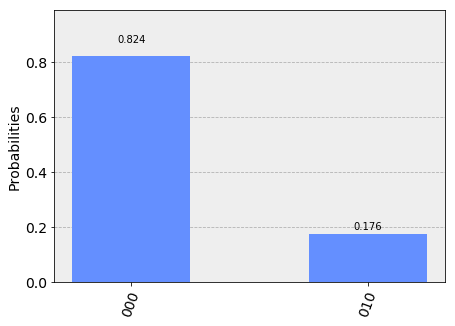

In [14]:
plot_histogram(result.get_counts(qc))

We can consider the 1 probability like a measurement of the 'distance' between the two points.

## In the following plot we can see many different visualizations related to the quantum circuit

In [15]:
# State vector visualizing

#state_vec_sim_bck="statevector_simulator"
state_vec_sim_bck=Aer.get_backend('statevector_simulator')

n = 3  # number of qubits 
q = QuantumRegister(n)
c = ClassicalRegister(n)

i=0
j=7

qc = QuantumCircuit(q, c, name="State_super")
#theta_1 = dataset.at[i,'Teta']
theta_1=0
Theta_2=2
#theta_2 = dataset.at[i+j,'Teta']
#Compose the quantum circuit via qiskit
qc.h(q[1])
qc.h(q[0])
qc.h(q[2])

qc.u3(theta_1, pi, pi, q[0])
qc.u3(theta_2, pi, pi, q[2])
qc.cswap(q[1], q[0], q[2])
qc.h(q[1])

# execute the quantum circuit 
job = execute(qc, backend=state_vec_sim_bck)
state_superposition = job.result().get_statevector(qc)

## The overall matrix defining the whole circuit 
_Coefficients_

In [16]:
def overlap(state1, state2):
    return round(np.dot(state1.conj(), state2))

print(state_superposition)

overlap(state_superposition, state_superposition)

[ 0.70582111+0.j  0.37422109+0.j  0.        +0.j  0.33160003+0.j
  0.37422109+0.j  0.04262106+0.j -0.33160003+0.j  0.        +0.j]


(1+0j)

_probability density_

In [17]:
def state_2_rho(state):
    return np.outer(state, state.conj())

rho_superposition=state_2_rho(state_superposition)
print(rho_superposition)

[[ 0.49818345+0.j  0.26413314+0.j  0.        +0.j  0.2340503 +0.j
   0.26413314+0.j  0.03008284+0.j -0.2340503 -0.j  0.        +0.j]
 [ 0.26413314+0.j  0.14004142+0.j  0.        +0.j  0.12409172+0.j
   0.14004142+0.j  0.0159497 +0.j -0.12409172-0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        -0.j  0.        +0.j]
 [ 0.2340503 +0.j  0.12409172+0.j  0.        +0.j  0.10995858+0.j
   0.12409172+0.j  0.01413314+0.j -0.10995858-0.j  0.        +0.j]
 [ 0.26413314+0.j  0.14004142+0.j  0.        +0.j  0.12409172+0.j
   0.14004142+0.j  0.0159497 +0.j -0.12409172-0.j  0.        +0.j]
 [ 0.03008284+0.j  0.0159497 +0.j  0.        +0.j  0.01413314+0.j
   0.0159497 +0.j  0.00181655+0.j -0.01413314-0.j  0.        +0.j]
 [-0.2340503 +0.j -0.12409172+0.j  0.        +0.j -0.10995858+0.j
  -0.12409172+0.j -0.01413314+0.j  0.10995858+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   

## The 3-d representation of the complex coefficients
The visualizations generated by the functions are:
- 'plot_state_city': The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city
- 'plot_state_hinton': Same as 'city' but with the size of the element represents the value of the matrix element.  
- 'plot_bloch_multivector': The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.  
- 'plot_state_qsphere': The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere` for each component. 

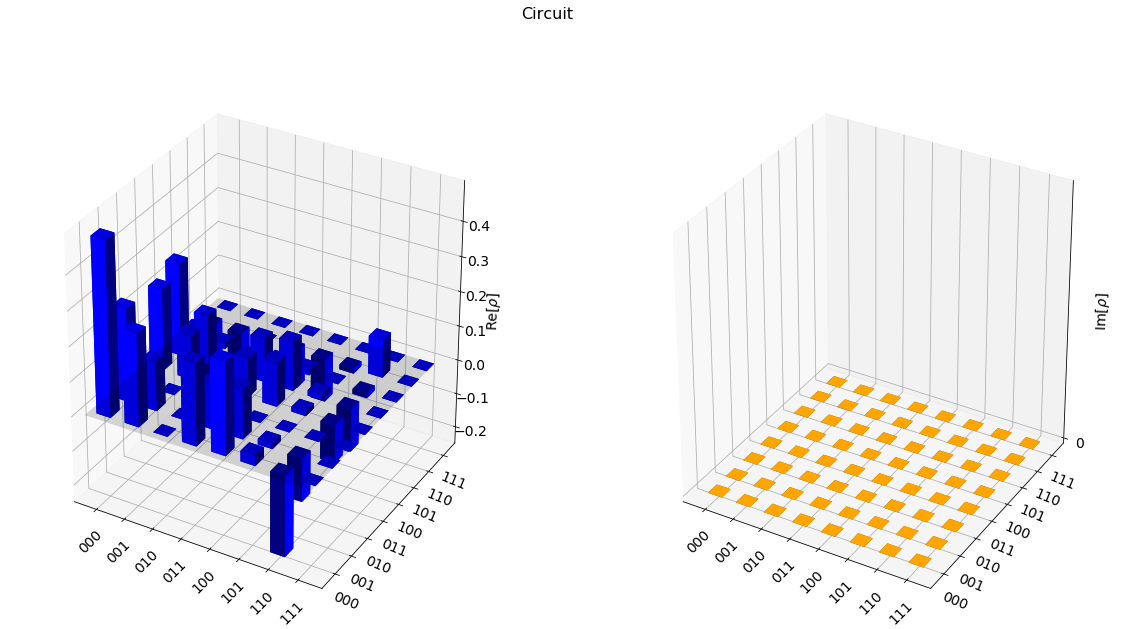

In [18]:
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere
plot_state_city(rho_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])
#plot_state(rho_superposition,'city')

## Same as above but as a map

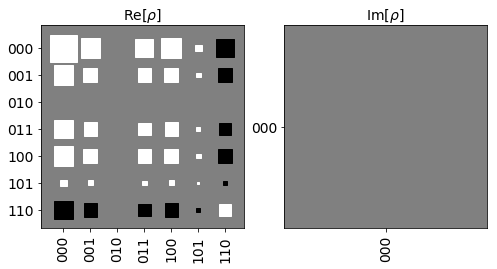

In [19]:
plot_state_hinton(state_superposition)

## Bloch state of the single qubits

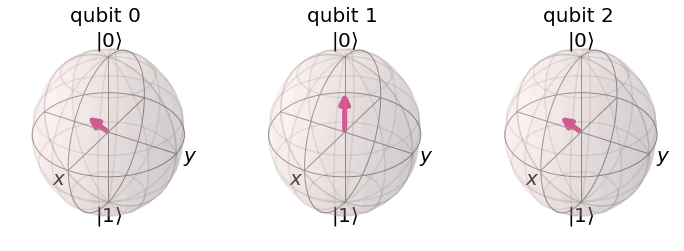

In [20]:
plot_bloch_multivector(state_superposition)

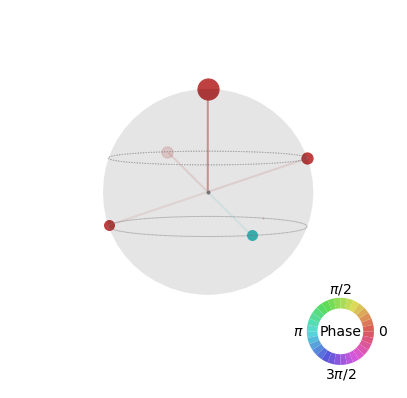

In [21]:
plot_state_qsphere(state_superposition)

## Massive cycle execution of all possible distance pairs
In order to make a confrontation between the Euclidean and quantum distance we perform a double loop cycle in the dataset data getting the distance (running the circuit) on all pairs of points.

In [22]:
# Define result dataframe
df_res = pd.DataFrame(columns=('I', 'J','Annual Income_i','Annual Income_j','Spending Score_1_to_100_i','Spending Score_1_to_100_j','Theta_i', 'Theta_j', 'Quantum_Distance','ClassicDistance'))

#Define a loop to compute the distance between each pair of points

elements=20

#main cycle
for i in range(0,elements):
    for j in range(0,elements): 
        # Set the parament theta about different point
        theta_1 = dataset.at[i,'Teta']
        theta_2 = dataset.at[j,'Teta']
        ai_i = dataset.at[i,'Annual Income_k$']
        ai_j = dataset.at[j,'Annual Income_k$']
        sc_i = dataset.at[i,'Spending Score_1_to_100']
        sc_j = dataset.at[j,'Spending Score_1_to_100']
        
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit ( qr, cr, name="k_means")
        
        # Compose the quantum circuit via qiskit
        qc.h(qr[1])

        qc.u3(theta_1, pi, pi, qr[0])
        qc.u3(theta_2, pi, pi, qr[2])
        qc.cswap(qr[1], qr[0], qr[2])
        qc.h(qr[1])
        qc.measure(qr[1], cr[1])
        
        # eseguo il circuito costruito sulla coppia I,J
        job_exp = execute(qc, backend=backend, shots=2048) 
        result = job_exp.result()
        # calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['000']
        if '010' in result.get_counts(qc):
            v2=result.get_counts(qc)['010']
        else:
            v2=0
        prob=v2/(v1+v2) # Probability of obtaining 1 that is "quantum distance"
        # Classic distance calculation
        cl_dist=math.sqrt(((ai_i-ai_j)**2)+((sc_i-sc_j)**2))

        #Final output writing
        df_res = df_res.append({'I':i, 'J':j,'Annual Income_i':ai_i,'Annual Income_j':ai_j,'Spending Score_1_to_100_i':sc_i,'Spending Score_1_to_100_j':sc_j,
                                'Theta_i':theta_1, 'Theta_j':theta_2, 'Quantum_Distance':prob,'ClassicDistance':cl_dist} , ignore_index=True)
print('JOB Ended')

JOB Ended


In [23]:
# Result Dataset Information
#df_res.info()

In [24]:
# check for null values
#df_res.isnull().sum()

In [25]:
df_res.to_csv('QuantumDistances.csv',index=False)

In [26]:
df_res = pd.read_csv('QuantumDistances.csv')

In [27]:
dataset=df_res
dataset

,I,J,Annual Income_i,Annual Income_j,Spending Score_1_to_100_i,Spending Score_1_to_100_j,Theta_i,Theta_j,Quantum_Distance,ClassicDistance
0,0.0,0.0,19.0,19.0,99.0,99.0,0.189614,0.189614,0.000000,0.000000
1,0.0,1.0,19.0,29.0,99.0,87.0,0.189614,0.321751,0.001953,15.620499
2,0.0,2.0,19.0,21.0,99.0,66.0,0.189614,0.308053,0.002930,33.060551
3,0.0,3.0,19.0,34.0,99.0,73.0,0.189614,0.435877,0.008301,30.016662
4,0.0,4.0,19.0,21.0,99.0,35.0,0.189614,0.540420,0.015137,64.031242
5,0.0,5.0,19.0,34.0,99.0,17.0,0.189614,1.107149,0.091309,83.360662
6,0.0,6.0,19.0,20.0,99.0,15.0,0.189614,0.927295,0.076172,84.005952
7,0.0,7.0,19.0,33.0,99.0,4.0,0.189614,1.450173,0.166992,96.026038
8,0.0,8.0,19.0,46.0,99.0,46.0,0.189614,0.785398,0.041016,59.481089
9,0.0,9.0,19.0,49.0,99.0,55.0,0.189614,0.727770,0.032227,53.254108


## Calculation Correlation between Quantum and Classic Distance

In [28]:
cor=dataset['Quantum_Distance'].corr(dataset['ClassicDistance'],method='pearson')
print("{0:.0f}%".format(cor * 100))

60%


## Diagrams of correlation with Seaborn of a dataset with distances only

In [29]:
dataset.drop(['Theta_i','Theta_j','I','J'], axis=1, inplace=True)

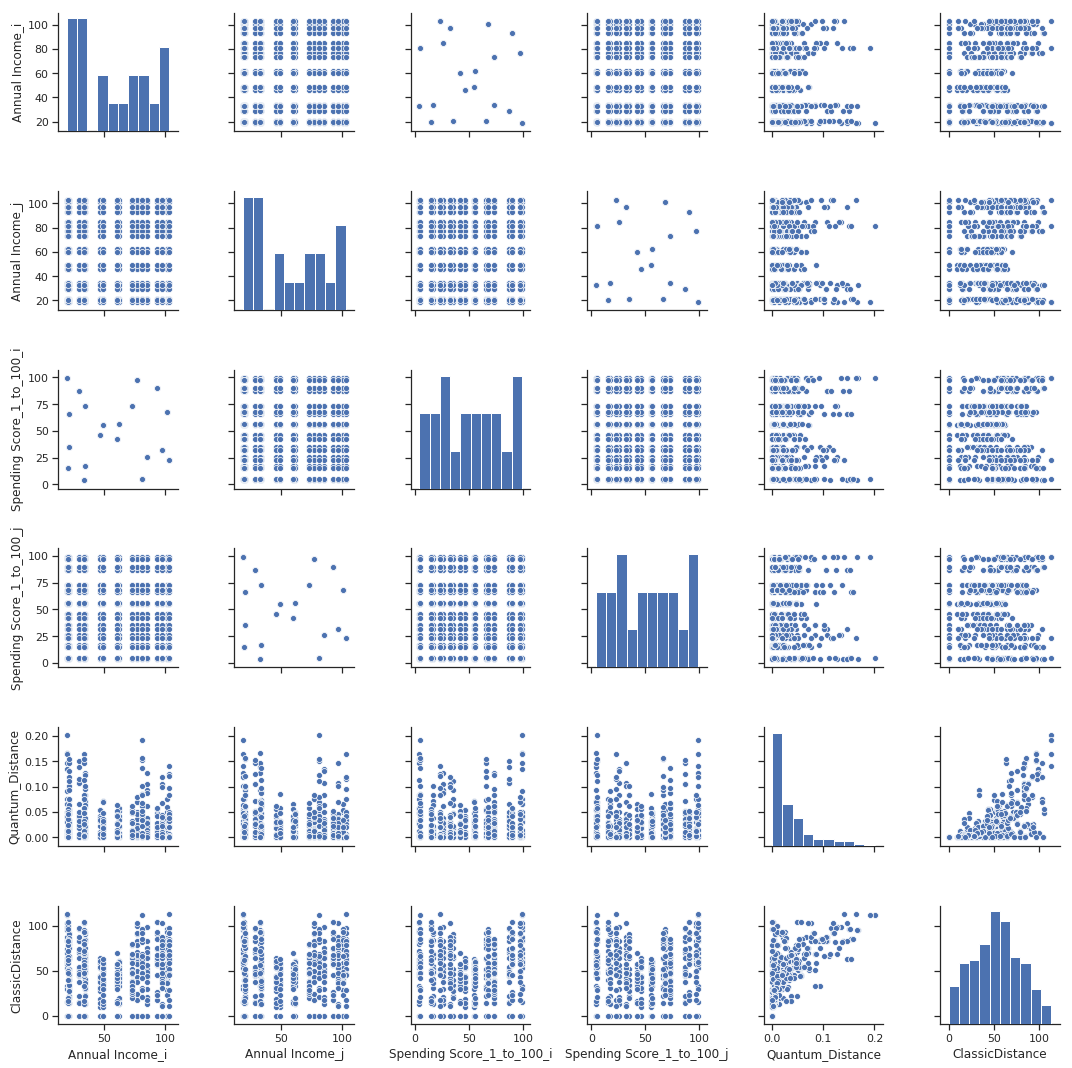

In [30]:
# Determine the pairplot matrix for correlation verification
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset)

## Conclusion: 
the correlation between quantum distance and classical distance is proven although the coefficient is not high due to statistical errors inherent in quantum measurement

## Now we will load another dataset which enhances clusters differences

In [33]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YiaJob6uTcDVElr7CTjWhrloL9H7tP1gR_GmDWCli8sh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='matrix-donotdelete-pr-dch8wobsozzamt',Key='Quantumnew2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
dataset=df_data_1
#dataset['Teta']=np.arctan(dataset['Column2'].values.astype(int)/dataset['Column1'].values.astype(int))
dataset['Teta']=np.arctan(dataset['Column2'].values/dataset['Column1'].values)
#dataset['ID']=dataset.reset_index().index
dataset.head(20)

,Column1,Column2,ID,Teta
0,16,400,1,1.530818
1,15,440,2,1.536719
2,28,430,3,1.505772
3,38,425,4,1.481622
4,25,451,5,1.515421
5,32,460,6,1.501343
6,32,15,31,0.438337
7,36,16,32,0.418224
8,31,14,33,0.424194
9,16,8,34,0.463648


## Let's read the dataset in X Matrix

In [35]:
s=(20,2)
X=np.zeros(s)
X[:,0]=dataset['ID']
X[:,1]=dataset['Teta']*1.

In [36]:
#If you zoom out this curve then you will see that last elbow comes at k=3
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,21)
##Finally we got that k=5
from sklearn.cluster import KMeans

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42,max_iter=100000,tol=0.00000001, verbose=0)
y_kmeans= kmeansmodel.fit_predict(X)
kmeans= kmeansmodel.fit(X)

In [37]:
# centroids position
centers_float = kmeans.cluster_centers_
#centers=np.rint(centers_float).astype(int)
centers=(centers_float)
print('centroids=',centers)

centroids= [[3.45000000e+01 4.45854728e-01]
 [6.35000000e+01 5.60125739e-02]
 [3.50000000e+00 1.51194890e+00]]


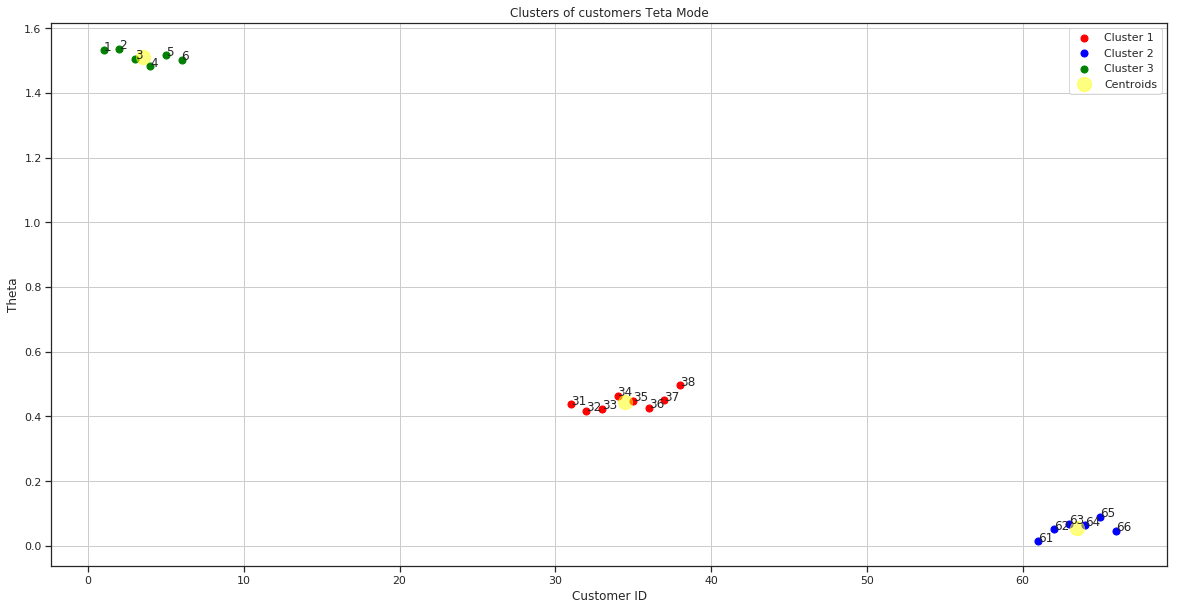

In [38]:
#Visualizing all the clusters 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

## Now let's start dancing with qubits...
We will calculate the clusters by using low level functions that can be used for both classic and quantum computation. The only difference is in the way we call the below defined findClosestCentroids. mode=0 means classic
mode=1 means quantum
## First of all we will define the quantum distance as a function

In [39]:
def quantumdistance(theta_1,theta_2, shots):
#    prob=np.zeros(3)
#    for j in range(0,3):
        pi = math.pi
        qr = QuantumRegister(3)
        cr = ClassicalRegister(3)
        qc = QuantumCircuit ( qr, cr, name="k_means")
        
        # Achieve the quantum circuit via qiskit
        qc.h(qr[1])

        qc.u3(theta_1, pi, pi, qr[0])
        qc.u3(theta_2, pi, pi, qr[2])
        qc.cswap(qr[1], qr[0], qr[2])
        qc.h(qr[1])
        qc.measure(qr[1], cr[1])

        # eseguo il circuito costruito sulla coppia I,J
        backend = Aer.get_backend('qasm_simulator')
        job_exp = execute(qc, backend=backend, shots=shots) 
        result = job_exp.result()
        # calculate the ratio between the 0 and tha one result in measure registry
        v1=result.get_counts(qc)['000']
        if '010' in result.get_counts(qc):
            v2=result.get_counts(qc)['010']
        else:
            v2=0
            
        prob=v2/(v1+v2) # Probab

        return prob
#mycalculation=quantumdistance(1.,0.01, 2048)
#print(mycalculation)

In [40]:
def initcentroids(X,K):
# Assigns the the initial values of centroids picking randomly from inside the example data 
#
    b=np.size(X[1, :])
    d=np.size(X[:, 1])
    c=(K,b)
    centroids = np.zeros(c)
#   executes a random permutation of the X index
    randidx = np.random.permutation(d)
#   assigns the initial value of centroids to the first k values of the randomized permutation
    centroids = X[randidx[0:K], :];
    return centroids
#init_centroids=initcentroids(X,3)
#print(init_centroids)

In [41]:
def findClosestCentroids(X, centroids, mode):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

# Set K
    dimension=np.size(X,0)

    K = np.size(centroids,0);

# You need to return the following variables correctly.
    s=(dimension)
    idx = np.zeros(s,dtype=int);

    for i in range(0,dimension):
        minimo=10000
        dist=0
        for j in range(0,K):
            if mode==1: 
                dist = (X[i,0]-centroids[j,0])**2+(X[i,1]-centroids[j,1])**2
            else:
                dist=quantumdistance(X[i,1],centroids[j,1], 2048)
            if dist <= minimo:
                minimo = dist
                idx[i] = j
    return idx
#s=(3,2)
#centroids=np.zeros(s)

#centroids=centers

#print('Centroids=',centroids)
#Classic=findClosestCentroids(X, centroids, 1)
#print('Clusters with Classic',Classic)
#Quantistic=findClosestCentroids(X, centroids, 0)
#print('Clusters with Quantistic',Quantistic)

In [42]:
def computeCentroids(X,idx,K):
#   Calculates the (new) centroids as the mean of the points having the same membership
#
    s=(K,2)
    r=(K,1)
    m=np.size(X[:,0])
    centroids=np.zeros(s)
    C=np.zeros(r);
    for j in range (0,K):
        for i in range (1,m):
            if idx[i] == j:
                centroids[j,:]=centroids[j,:]+X[i,:];
                C[j]=C[j]+1;
    for j in range(0,K):
        centroids[j,:]=1/C[j]*centroids[j,:]
    return centroids

#a=computeCentroids(X,Quantistic,3)
#print(a)

In [43]:
def runkmeans (X, initial_centroids,max_iters, mode):
#   Executes in sequence : centroids initialization, repeat until max_iters is reached: findclosest 
#   points, calculates the new centroids

# Initialize values
    m = np.size(X[:,0])
    n = np.size(X[1,:])
    d = (m,1)
    K = np.size(initial_centroids, 0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(d)
#  execute loop
    for i in range (1,max_iters):  
# Output progress
        print('K-Means iteration ...\n', i, max_iters)
# For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids, mode)
# Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
    return centroids, idx
init_centroids=initcentroids(X,3)
a=runkmeans (X, init_centroids,20,1)

centers=a[0]
Quantistic=a[1]
print(centers)
print(Quantistic)

K-Means iteration ...
 1 20
K-Means iteration ...
 2 20
K-Means iteration ...
 3 20
K-Means iteration ...
 4 20
K-Means iteration ...
 5 20
K-Means iteration ...
 6 20
K-Means iteration ...
 7 20
K-Means iteration ...
 8 20
K-Means iteration ...
 9 20
K-Means iteration ...
 10 20
K-Means iteration ...
 11 20
K-Means iteration ...
 12 20
K-Means iteration ...
 13 20
K-Means iteration ...
 14 20
K-Means iteration ...
 15 20
K-Means iteration ...
 16 20
K-Means iteration ...
 17 20
K-Means iteration ...
 18 20
K-Means iteration ...
 19 20
[[3.45000000e+01 4.45854728e-01]
 [4.00000000e+00 1.50817516e+00]
 [6.35000000e+01 5.60125739e-02]]
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2]


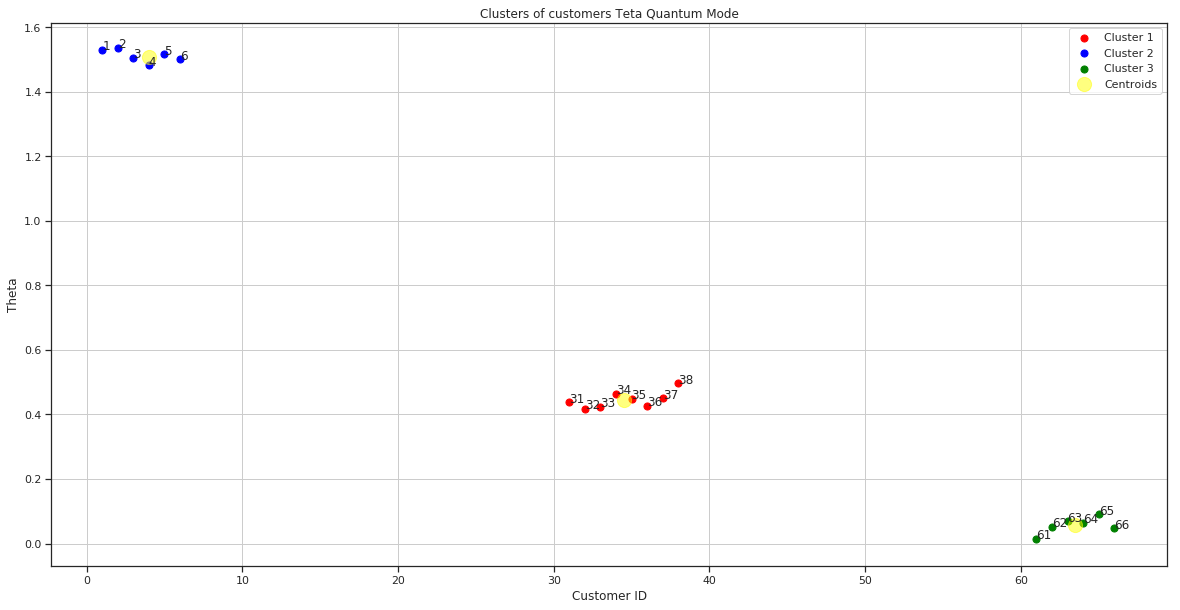

In [44]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(X[Quantistic == 3, 0], X[Quantistic == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
#plt.scatter(X[Quantistic == 4, 0], X[Quantistic == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

## Now let's try with our previous problem
We apply a 100 factor to the Teta values to make x and y values similar and to facilitate the algorithm convergence

In [46]:
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6e66e2db78b04f06a0fb0a77e04e36f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YiaJob6uTcDVElr7CTjWhrloL9H7tP1gR_GmDWCli8sh',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6e66e2db78b04f06a0fb0a77e04e36f5.get_object(Bucket='matrix-donotdelete-pr-dch8wobsozzamt',Key='DataForQComparison.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
dataset=df_data_1
dataset['Teta']=np.arctan(dataset['Annual Income_k$'].values.astype(int)/dataset['Spending Score_1_to_100'].values.astype(int))*10
dataset['ID']=dataset.reset_index().index
dataset.head(10)

,Annual Income_k$,Spending Score_1_to_100,Teta,ID
0,19,99,1.896136,0
1,29,87,3.217506,1
2,21,66,3.080528,2
3,34,73,4.358770,3
4,21,35,5.404195,4
5,34,17,11.071487,5
6,20,15,9.272952,6
7,33,4,14.501727,7
8,46,46,7.853982,8
9,49,55,7.277697,9


In [47]:
s=(20,2)
X=np.zeros(s)
X[:,0]=dataset['ID']
X[:,1]=dataset['Teta']*10

## The first run is Classic but we set K=3 istead of 5 

In [48]:
init_centroids=initcentroids(X,3)
a=runkmeans (X, init_centroids,20,1)

centers=a[0]
Quantistic=a[1]
print(centers)
print(Quantistic)

K-Means iteration ...
 1 20
K-Means iteration ...
 2 20
K-Means iteration ...
 3 20
K-Means iteration ...
 4 20
K-Means iteration ...
 5 20
K-Means iteration ...
 6 20
K-Means iteration ...
 7 20
K-Means iteration ...
 8 20
K-Means iteration ...
 9 20
K-Means iteration ...
 10 20
K-Means iteration ...
 11 20
K-Means iteration ...
 12 20
K-Means iteration ...
 13 20
K-Means iteration ...
 14 20
K-Means iteration ...
 15 20
K-Means iteration ...
 16 20
K-Means iteration ...
 17 20
K-Means iteration ...
 18 20
K-Means iteration ...
 19 20
[[ 15.4        136.73023675]
 [  2.5         40.1524952 ]
 [ 10.3         85.8026817 ]]
[1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0]


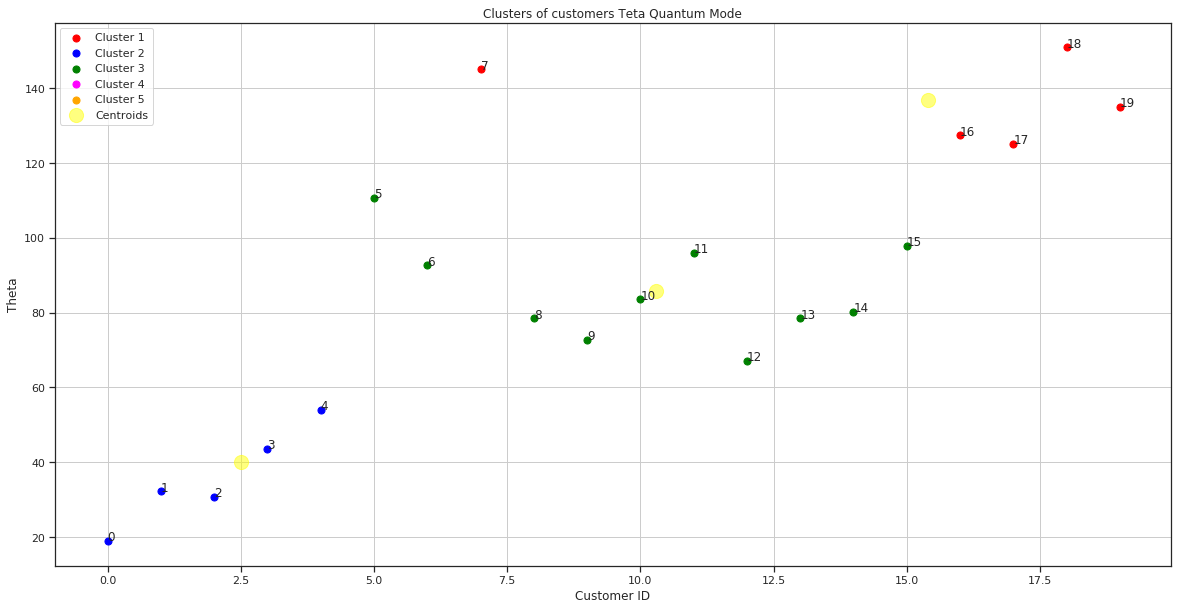

In [49]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[Quantistic == 3, 0], X[Quantistic == 3, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[Quantistic == 4, 0], X[Quantistic == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()

## The second run is Quantum

In [50]:
X[:,1] = X[:,1]/100
init_centroids=initcentroids(X,3)
a=runkmeans (X, init_centroids,10,0)

centers=a[0]
Quantistic=a[1]
print(centers)
print(Quantistic)

K-Means iteration ...
 1 10
K-Means iteration ...
 2 10
K-Means iteration ...
 3 10
K-Means iteration ...
 4 10
K-Means iteration ...
 5 10
K-Means iteration ...
 6 10
K-Means iteration ...
 7 10
K-Means iteration ...
 8 10
K-Means iteration ...
 9 10
[[15.4         1.36730237]
 [ 9.85714286  0.91373463]
 [ 6.28571429  0.5414608 ]]
[2 2 2 2 2 1 1 0 1 2 1 1 2 2 1 1 0 0 0 0]


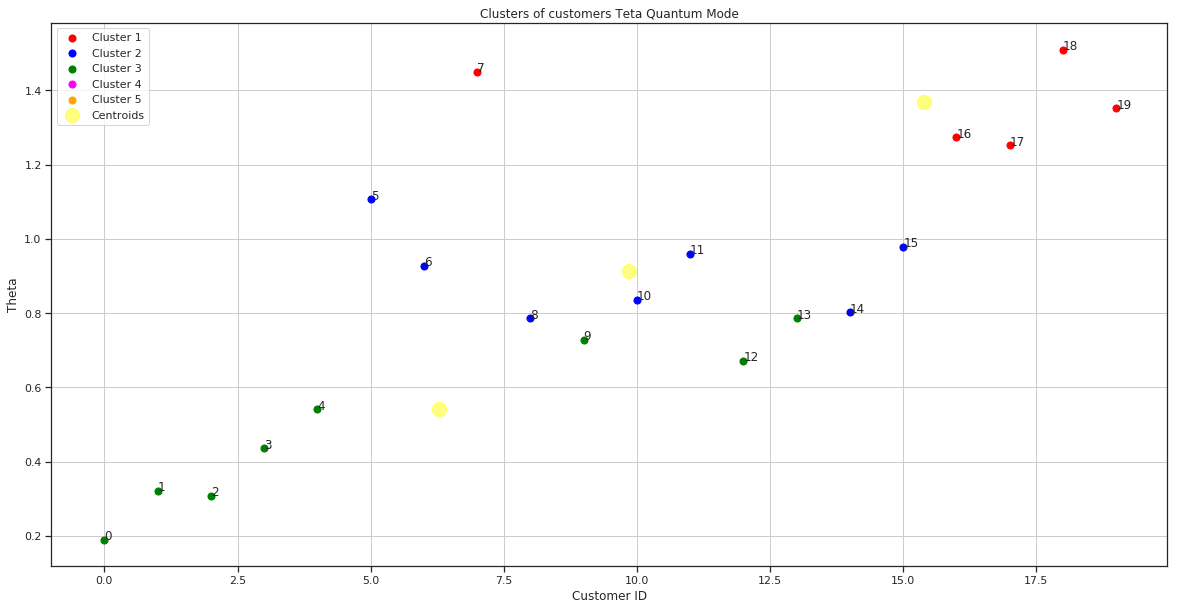

In [51]:
#Visualizing all the clusters 

plt.figure(figsize=(20,10))
plt.scatter(X[Quantistic == 0, 0], X[Quantistic == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[Quantistic == 1, 0], X[Quantistic == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Quantistic == 2, 0], X[Quantistic == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[Quantistic == 3, 0], X[Quantistic == 3, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[Quantistic == 4, 0], X[Quantistic == 4, 1], s = 50, c = 'orange', label = 'Cluster 5')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5,label = 'Centroids');
plt.title('Clusters of customers Teta Quantum Mode')
plt.xlabel('Customer ID')
plt.ylabel('Theta')
x = X[:, 0]
y = X[:, 1]
etichette=dataset['ID'].tolist()
for i, txt in enumerate(etichette):
    plt.annotate(txt, (x[i], y[i]))
plt.legend()
plt.grid()
plt.show()